# Pymaceuticals Inc.
---

### Analysis

- There is a strong positive correlation between average tumor volume and weight for all 249 mice analysed at 0.84.
- The male and female mice gender distribution is almost even with the male mice pulling slightly ahead at 51% (2% higher than females).
- Ramicane seems to be the most effective at reducing tumor growth followed closely by Capomulin. 
- Capomulin was the main focus of analysis due to showcasing just how effective this drug regimen was at reducing tumor volume against weight metrics for all 249 mice analysed. 
- Capomulin and Ramicane were also subject to the largest recorded number of mice in testing out how effective the drug regimens were.
 

In [185]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import scipy.stats as st

# Study data files
mouse_metadata_path = "matplotlib-challenge/data/Mouse_metadata.csv"
study_results_path = "matplotlib-challenge/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [186]:
# Checking the number of mice.
mice_number = mouse_study_df["Mouse ID"].nunique()
mice_number

249

In [187]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes_ID = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dupes_ID

array(['g989'], dtype=object)

In [188]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupes_df = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
mice_dupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [189]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(mice_dupes_ID) == False]
mouse_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [190]:
# Checking the number of mice in the clean DataFrame.
mouse_clean = mouse_clean_df["Mouse ID"].nunique()
mouse_clean

248

## Summary Statistics

In [191]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).mean()
mouse_median = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).median()
mouse_var = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).var()
mouse_std = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).std()
mouse_sem = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).sem()

mouse_summary_df = pd.DataFrame({"Mean Tumor Volume":mouse_mean, 
                            "Median Tumor Volume":mouse_median, 
                           "Tumor Volume Variance":mouse_var, 
                           "Tumor Volume Std. Dev.":mouse_std, 
                           "Tumor Volume Std. Err.":mouse_sem})

# Assemble the resulting series into a single summary DataFrame.
mouse_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [192]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# ref df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})
mouse_summary_agg =  mouse_clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].aggregate(['mean', 'median', 'var', 'std', 'sem'])
mouse_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

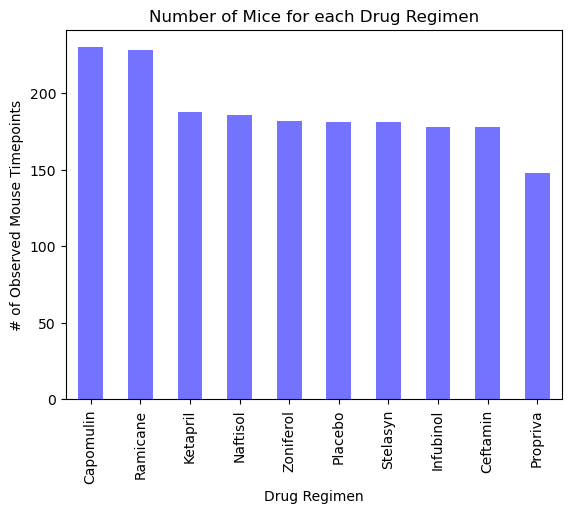

In [193]:
# accurate count of data points needed for each drug regimen
mice_count = mouse_clean_df["Drug Regimen"].value_counts()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bplot_pandas = mice_count.plot.bar(color='b', alpha=0.55)

# Setting the xlabel, ylabel, and title
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

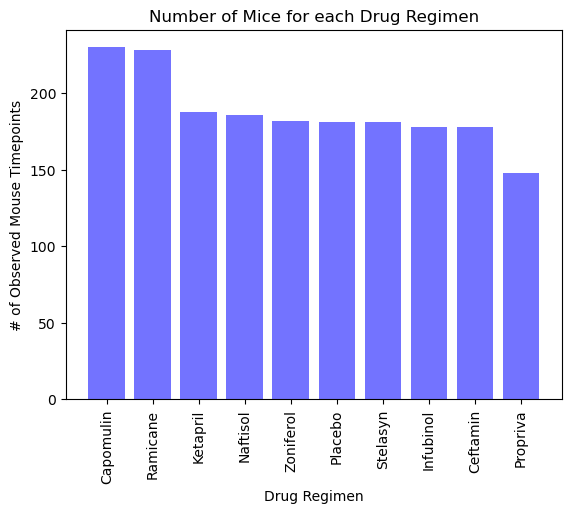

In [194]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='b', alpha=0.55, align='center')

# Setting the xlabel, ylabel, and title
plt.title("Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

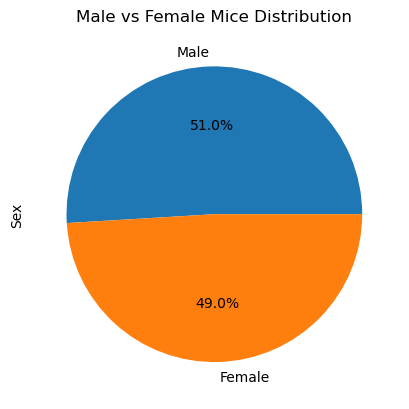

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_fem_mice = mouse_clean_df["Sex"].value_counts()
plt.title("Male vs Female Mice Distribution")
male_fem_mice.plot.pie(autopct= "%1.1f%%")
plt.show()

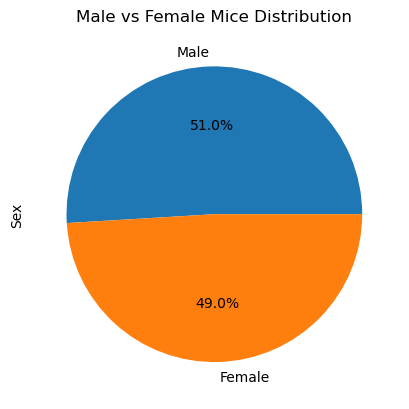

In [196]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = list(male_fem_mice.index)
plot = male_fem_mice.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mice Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [197]:
# first add all 4 treatments into Dataframe formats
capo_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Capomulin", :]
rami_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Ramicane", :]
infu_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by displaying Capomulin metrics
capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [198]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Capomulin
# Determining Capomulin last (greatest) timepoint for each mouse
capo_last = capo_df.groupby('Mouse ID').max()['Timepoint']
capo_last_vol = pd.DataFrame(capo_last)
capo_last_merge = pd.merge(capo_last_vol, mouse_clean_df, on=("Mouse ID","Timepoint"),how="left")
capo_last_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [199]:
# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol = capo_last_merge["Tumor Volume (mm3)"]

# Calculating the IQR for Capomulin  
quart1 = tumor_vol.quantile([.25,.5,.75])
lowerqrt1 = quart1[0.25]
upperqrt1 = quart1[0.75]
iqr1 = upperqrt1-lowerqrt1

# Determine outliers using upper and lower bounds
lower_bound = lowerqrt1 - (1.5*iqr1)
upper_bound = upperqrt1 + (1.5*iqr1)

# Looking for any potential outliers
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [200]:
# Ramicane
# Determining Ramicane last (greatest) timepoint for each mouse
rami_last = rami_df.groupby('Mouse ID').max()['Timepoint']
rami_last_vol = pd.DataFrame(rami_last)
rami_last_merge = pd.merge(rami_last_vol, mouse_clean_df, on=("Mouse ID","Timepoint"),how="left")
rami_last_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [201]:
# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol2 = rami_last_merge["Tumor Volume (mm3)"]

# Calculating the IQR for Ramicane  
quart2 = tumor_vol2.quantile([.25,.5,.75])
lowerqrt2 = quart2[0.25]
upperqrt2 = quart2[0.75]
iqr2 = upperqrt2-lowerqrt2

# Determine outliers using upper and lower bounds
lower_bound2 = lowerqrt2 - (1.5*iqr2)
upper_bound2 = upperqrt2 + (1.5*iqr2)

# Looking for any potential outliers
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [202]:
# Infubinol
# Determining Infubinol last (greatest) timepoint for each mouse
infu_last = infu_df.groupby('Mouse ID').max()['Timepoint']
infu_last_vol = pd.DataFrame(infu_last)
infu_last_merge = pd.merge(infu_last_vol, mouse_clean_df, on=("Mouse ID","Timepoint"),how="left")
infu_last_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [203]:
# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol3 = infu_last_merge["Tumor Volume (mm3)"]

# Calculating the IQR for Infubinol  
quart3 = tumor_vol3.quantile([.25,.5,.75])
lowerqrt3 = quart3[0.25]
upperqrt3 = quart3[0.75]
iqr3 = upperqrt3-lowerqrt3

# Determine outliers using upper and lower bounds
lower_bound3 = lowerqrt3 - (1.5*iqr3)
upper_bound3 = upperqrt3 + (1.5*iqr3)

# Looking for any potential outliers
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [204]:
# Ceftamin
# Determining Ceftamin last (greatest) timepoint for each mouse
ceft_last = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_last_vol = pd.DataFrame(ceft_last)
ceft_last_merge = pd.merge(ceft_last_vol, mouse_clean_df, on=("Mouse ID","Timepoint"),how="left")
ceft_last_merge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [205]:
# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol4 = ceft_last_merge["Tumor Volume (mm3)"]

# Calculating the IQR for Infubinol  
quart4 = tumor_vol4.quantile([.25,.5,.75])
lowerqrt4 = quart4[0.25]
upperqrt4 = quart4[0.75]
iqr4 = upperqrt4-lowerqrt4

# Determine outliers using upper and lower bounds
lower_bound4 = lowerqrt4 - (1.5*iqr4)
upper_bound4 = upperqrt4 + (1.5*iqr4)

# Looking for any potential outliers
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


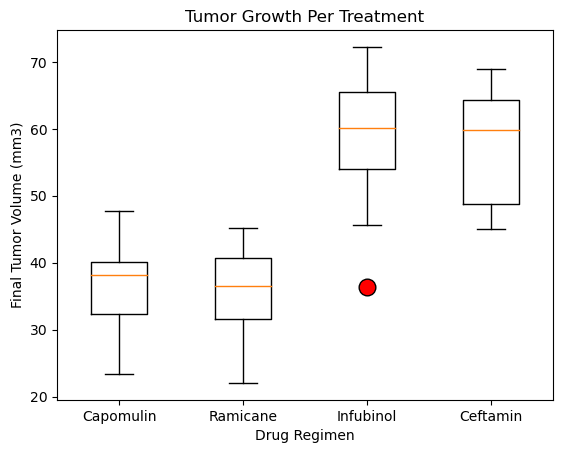

In [206]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tvol_box_plot = [tumor_vol, tumor_vol2, tumor_vol3, tumor_vol4]
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Growth Per Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tvol_box_plot, flierprops=flierprops, labels=treatment_list)

plt.savefig('Tumor Boxplot')
plt.show()

## Line and Scatter Plots

In [207]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# First get a list of all mouse with the Capomulin Drug Regimen
capo_mice = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Capomulin"]
capo_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [208]:
# Choosing mouse l509
mouse_l509 = mouse_clean_df.loc[mouse_clean_df["Mouse ID"] == "l509"]

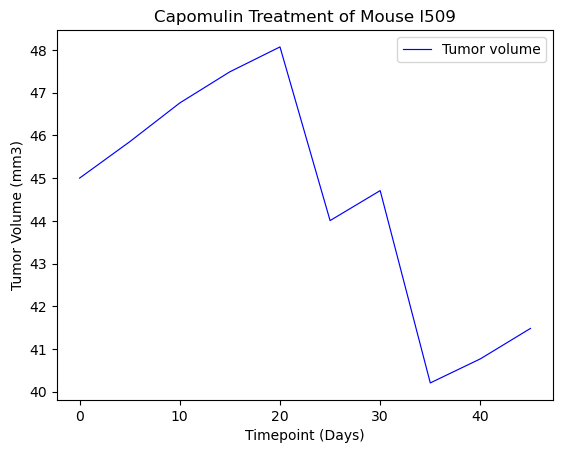

In [209]:
# Inputting variables for x/y 
tumor_vol_y = mouse_l509["Tumor Volume (mm3)"]
timepoint_x = mouse_l509["Timepoint"]

# Generating line plot with the following specs 
plt.plot(timepoint_x, tumor_vol_y, color="blue", label="Tumor volume", linewidth=0.85, markersize=12)

# Placing legend at the best spot possible matplotlib deems fit
plt.legend(loc="best")

# Attaching titles and labels to the graph; spacing out timepoint placements
plt.title( "Capomulin Treatment of Mouse l509")
plt.xticks(np.arange(min(timepoint_x), max(timepoint_x)+1, 10))
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Print our chart to the screen and save an external copy
plt.savefig('Capomulin Line Plot')
plt.show()

C:\Users\facea\AppData\Local\Temp\ipykernel_7572\4059109329.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capo_tumor_avg = capo_df.groupby(['Mouse ID']).mean()


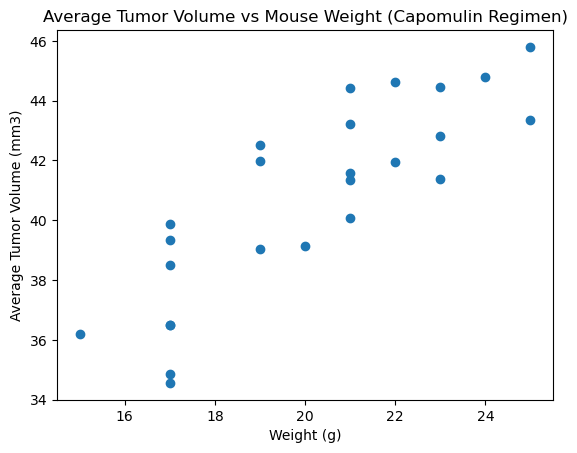

In [210]:
# Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen
capo_tumor_avg = capo_df.groupby(['Mouse ID']).mean()

# Attaching titles and labels to the graph; spacing out timepoint placements
plt.scatter(capo_tumor_avg['Weight (g)'], capo_tumor_avg['Tumor Volume (mm3)'])
plt.title( "Average Tumor Volume vs Mouse Weight (Capomulin Regimen)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Print our chart to the screen and save an external copy
plt.savefig('Capomulin Scatter Plot')
plt.show()

## Correlation and Regression

In [211]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Equations and final printed result for correlation
correlation = st.pearsonr(capo_tumor_avg['Tumor Volume (mm3)'],capo_tumor_avg['Weight (g)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [212]:
# Equations and final printed results for the linear regression model
regress_values=st.linregress(capo_tumor_avg['Weight (g)'],capo_tumor_avg['Tumor Volume (mm3)'])
regress_values

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [213]:
# y = mx + C
# Slope and Intercept values plugged in from Linear Regression model values already obtained above
m_slope = 0.9544396890241048
c_inter = 21.552160532685008

# Simplifying in a straight line equation format rounded down two dec. places
st_line_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(c_inter,2))
print(st_line_eq)

y = 0.95x + 21.55


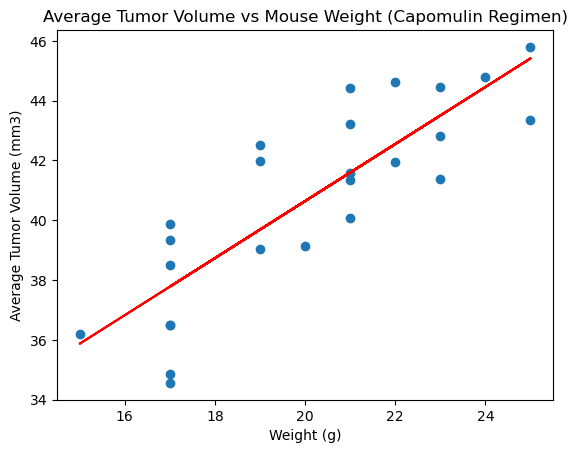

In [214]:
st_line_values = capo_tumor_avg['Weight (g)']*m_slope+c_inter
plt.scatter(capo_tumor_avg['Weight (g)'],capo_tumor_avg['Tumor Volume (mm3)'])
plt.plot(capo_tumor_avg['Weight (g)'],st_line_values,color="red")
plt.title( "Average Tumor Volume vs Mouse Weight (Capomulin Regimen)")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('Capomulin Linear Regression')
plt.show()